<a href="https://colab.research.google.com/github/tecatanka/SWB_Mod_Opt/blob/main/SWB_Tuning_Regression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import packages
#from __future__ import absolute_import, division, print_function
#import pathlib
#!pip install -q -U keras-tuner  # pip installation of keras tuner

#Google colab
from google.colab import files

# Importing modules for data processing and plotting
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import time

#Statistical modules
from scipy import stats
import pylab
from sklearn.metrics import mean_squared_error

# Importing modules for neural net creation
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("Tensor flow version: ", tf.__version__)

Tensor flow version:  2.12.0


# Regression example using a Neural Net

Energy consumption data


In [4]:
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [6]:
# Data acquisition

raw_dataset = pd.read_csv("insurance.csv")

In [7]:
# Create data object to work:

dataset = raw_dataset.copy()
dataset.tail(10) # looking last 10 rows (Note: Python starts indexing with zero 0->974 then 975 data points)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


import numpy as np
from google.colab import autoviz
df_5858562613824460370 = autoviz.get_df('df_5858562613824460370')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5858562613824460370, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1647802285695795863 = autoviz.get_df('df_1647802285695795863')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1647802285695795863, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3088174674616641598 = autoviz.get_df('df_3088174674616641598')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3088174674616641598, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8543606290410322405 = autoviz.get_df('df_8543606290410322405')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8543606290410322405, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3255669000232294914 = autoviz.get_df('df_3255669000232294914')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3255669000232294914, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2422020382109918418 = autoviz.get_df('df_2422020382109918418')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2422020382109918418, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6251036391275735357 = autoviz.get_df('df_6251036391275735357')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6251036391275735357, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7531873652343113136 = autoviz.get_df('df_7531873652343113136')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7531873652343113136, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5681965741830098696 = autoviz.get_df('df_5681965741830098696')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5681965741830098696, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8901085259456583222 = autoviz.get_df('df_8901085259456583222')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8901085259456583222, *['smoker'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8676724894724152605 = autoviz.get_df('df_8676724894724152605')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8676724894724152605, *['region'], **{})
chart

import numpy as np
from google.colab import autoviz
df_607166524517694354 = autoviz.get_df('df_607166524517694354')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_607166524517694354, *[[['age', 'bmi'], ['bmi', 'children'], ['children', 'charges']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2328364559372598529 = autoviz.get_df('df_2328364559372598529')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2328364559372598529, *['sex', 'smoker'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7890109997454340653 = autoviz.get_df('df_7890109997454340653')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7890109997454340653, *['smoker', 'region'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8027256732885800915 = autoviz.get_df('df_8027256732885800915')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8027256732885800915, *['age', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6159022155493962474 = autoviz.get_df('df_6159022155493962474')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6159022155493962474, *['age', 'smoker'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1453572712319958482 = autoviz.get_df('df_1453572712319958482')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1453572712319958482, *['age', 'region'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7600552246610951199 = autoviz.get_df('df_7600552246610951199')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7600552246610951199, *['bmi', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1335927806009004434 = autoviz.get_df('df_1335927806009004434')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1335927806009004434, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4679445712003276132 = autoviz.get_df('df_4679445712003276132')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4679445712003276132, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1624814695706329869 = autoviz.get_df('df_1624814695706329869')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1624814695706329869, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5819788543447069314 = autoviz.get_df('df_5819788543447069314')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5819788543447069314, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz
df_812917498528805024 = autoviz.get_df('df_812917498528805024')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_812917498528805024, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7445875009665638187 = autoviz.get_df('df_7445875009665638187')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7445875009665638187, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7743874319609689681 = autoviz.get_df('df_7743874319609689681')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7743874319609689681, *['children'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5724777379515938420 = autoviz.get_df('df_5724777379515938420')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5724777379515938420, *['charges'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8313202006507729012 = autoviz.get_df('df_8313202006507729012')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8313202006507729012, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4580585700273971921 = autoviz.get_df('df_4580585700273971921')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4580585700273971921, *['smoker'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8876228688282806982 = autoviz.get_df('df_8876228688282806982')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8876228688282806982, *['region'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3070027360384381428 = autoviz.get_df('df_3070027360384381428')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3070027360384381428, *[[['age', 'bmi'], ['bmi', 'children'], ['children', 'charges']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3695606617490662174 = autoviz.get_df('df_3695606617490662174')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_3695606617490662174, *['sex', 'smoker'], **{})
chart

import numpy as np
from google.colab import autoviz
df_62771403300593814 = autoviz.get_df('df_62771403300593814')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_62771403300593814, *['smoker', 'region'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7061631118657739971 = autoviz.get_df('df_7061631118657739971')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7061631118657739971, *['age', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2368818116700856916 = autoviz.get_df('df_2368818116700856916')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2368818116700856916, *['age', 'smoker'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1453802467413361717 = autoviz.get_df('df_1453802467413361717')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1453802467413361717, *['age', 'region'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8638478493385293940 = autoviz.get_df('df_8638478493385293940')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8638478493385293940, *['bmi', 'sex'], **{'inner': 'stick'})
chart

# Brief EDA

In [8]:
# Number of rows in data set
num_rows=len(dataset)
num_rows

1338

In [9]:
# Number of columns
num_cols=len(dataset.columns)
num_cols

7

In [10]:
# Types of columns
types_cols=dataset.dtypes
types_cols

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
# Clean data
dataset.isna().sum() #add cells that have no data (NA)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Columns sex smoker and region are categorical

In [13]:
#Dummy variables generation: Job_type
dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region']).astype(int)
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [14]:
# Create training and test sets

y=dataset.charges
x=dataset.drop('charges', axis=1)
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [15]:
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

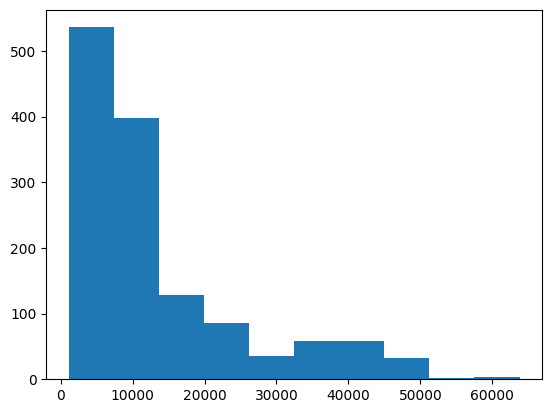

In [16]:
#Histogram of the response variable
plt.hist(y)
plt.show()

In [17]:
# Normality test
norm=stats.normaltest(y)
norm.pvalue

7.0156987886518414e-74

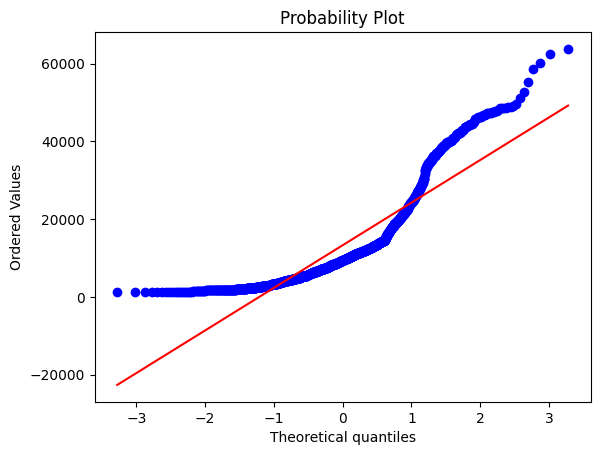

In [18]:
# Q-Q Plot
stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

In [19]:
# Obtaining the "best" transformation with Box-Cox
yt, fit_lambda=stats.boxcox(y)

In [20]:
fit_lambda

0.043716018912177364

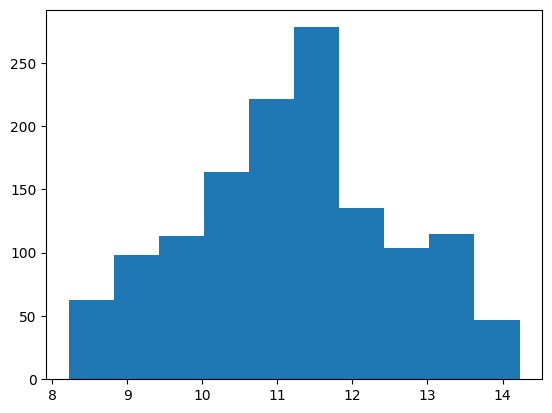

In [21]:
plt.hist(yt)
plt.show()

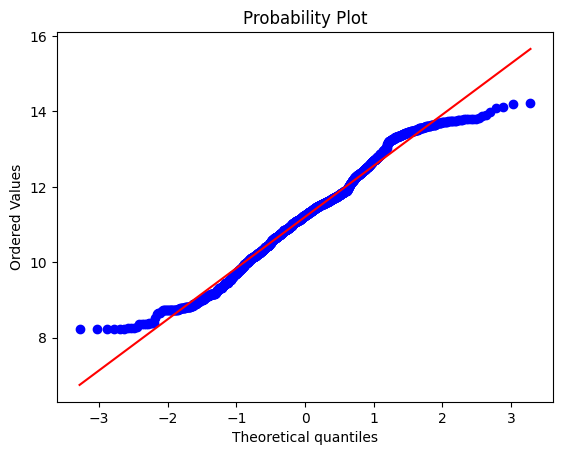

In [22]:
# Q-Q Plot
stats.probplot(yt, dist="norm", plot=pylab)
pylab.show()

In [23]:
# Normality test
norm=stats.normaltest(yt)
norm.pvalue

1.5398265984050724e-12

In [24]:
print(type(yt))
stats.describe(yt)

<class 'numpy.ndarray'>


DescribeResult(nobs=1338, minmax=(8.219048234396992, 14.227156243293791), mean=11.201337041121292, variance=1.8702403009599342, skewness=-0.008737402136693566, kurtosis=-0.6522737372547378)

In [25]:
# Split train and test sets
train_features, test_features, train_label, test_label=train_test_split(x,yt,test_size=0.2, random_state=42)


In [26]:
#number of rows train set
train_rows=len(train_features)
train_rows

1070

In [27]:
#number of rows test set
test_rows=len(test_features)
test_rows

268

In [28]:
#number of rows train set
y_train_rows=len(train_label)
y_train_rows

1070

In [29]:
#number of rows train set
y_test_rows=len(test_label)
y_test_rows

268

In [30]:
# Ranges of values in feature columns
train_features.describe().transpose()[['mean', 'std']]

,mean,std
age,39.357009,14.073960
bmi,30.069159,6.063808
children,1.107477,1.215983
sex_female,0.487850,0.500086
sex_male,0.512150,0.500086
smoker_no,0.794393,0.404334
smoker_yes,0.205607,0.404334
region_northeast,0.249533,0.432945
region_northwest,0.239252,0.426827
region_southeast,0.264486,0.441265


In [31]:
# Normalize variables via normalization layer in Keras:

#Create normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)

#Fit state of preprocessing layer to the data
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

[[39.35701    30.069159    1.1074772   0.48785046  0.5121495   0.7943925
   0.20560746  0.2495327   0.23925233  0.26448599  0.24672891]]


In [32]:
# Example normalizing the first row of features
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[46 19  2  1  0  1  0  0  1  0  0]]

Normalized: [[ 0.47 -1.83  0.73  1.02 -1.02  0.51 -0.51 -0.58  1.78 -0.6  -0.57]]


In [33]:
train_features.head(1)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19,2,1,0,1,0,0,1,0,0


# Linear model (simplistic)

In [34]:
# Linear regression with multiple inputs (X's)
# y=mx+b and m is a matrix, b is a vector

#Creating a two-step sequential model with first layer being normalizer
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [35]:
# Configure model with Keras
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [36]:
%%time
start_simple=time.time()
# Model fit for 100 epochs  (Epoch=complete pass of the training dataset through the algorithm)

history = linear_model.fit(
    train_features,
    train_label,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

end_simple=time.time()
print("time in seconds: ","{:.2f}".format(end_simple-start_simple))

time in seconds:  18.19
CPU times: user 10.8 s, sys: 447 ms, total: 11.2 s
Wall time: 18.2 s


In [37]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)


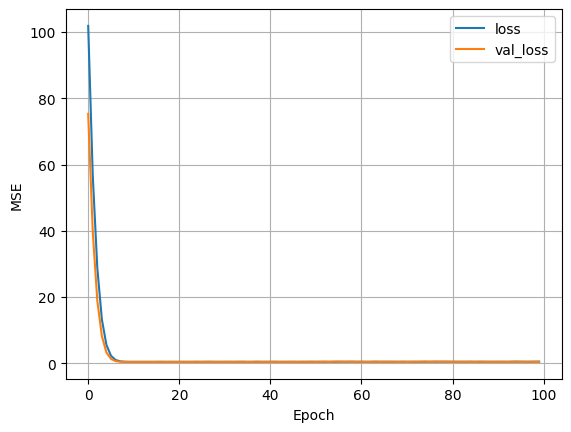

In [38]:
plot_loss(history)


In [39]:
# Collect result for test set
test_results={}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_label, verbose=0)


9/9 [==============================] - 0s 3ms/step


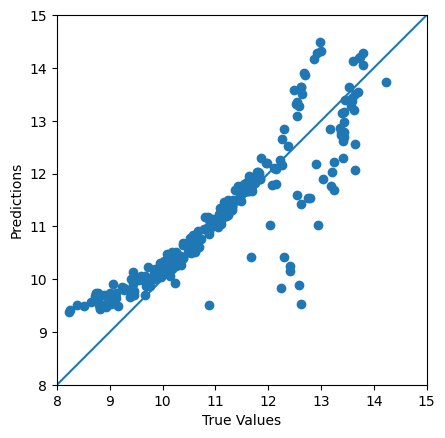

In [40]:
Linear_model_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, Linear_model_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


## Performance Simple model

In [41]:
MSE_Linear_model=mean_squared_error(Linear_model_predictions, test_label)
MSE_Linear_model

0.4162437192044444

# Regression using a DNN

Repeating the previous process using MULTIPLE LAYERS. The model's performance slightly improves on the validation dataset: mse


In [42]:
# Creating build and compile function with 2 inner layers
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


In [43]:
# Regression using a DNN
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [44]:
%%time
start_dnn=time.time()
# Train the model

history = dnn_model.fit(
    train_features,
    train_label,
    validation_split=0.2,
    verbose=0, epochs=100)

end_dnn=time.time()
print("time in seconds: ","{:.2f}".format(end_dnn-start_dnn))

time in seconds:  11.05
CPU times: user 9.9 s, sys: 384 ms, total: 10.3 s
Wall time: 11 s


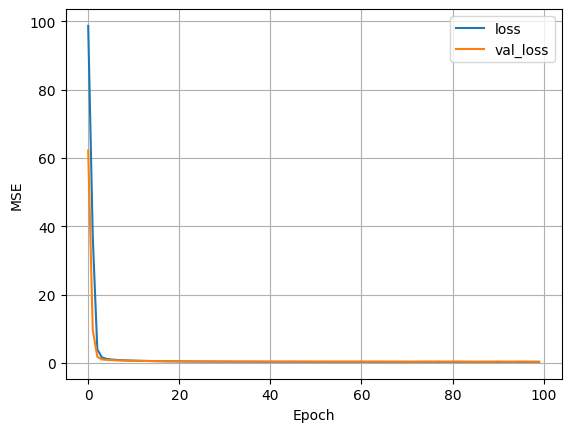

In [45]:
plot_loss(history)


9/9 [==============================] - 0s 2ms/step


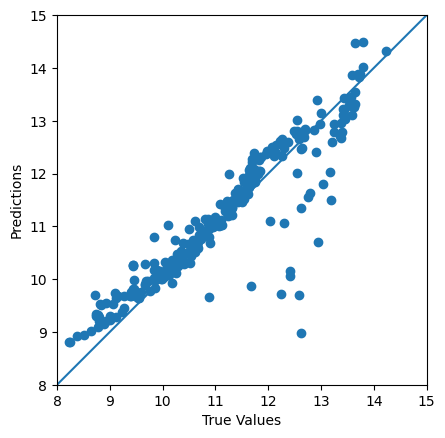

In [46]:
dnn_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, dnn_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



## Performance DNN Model

In [47]:
MSE_DNN=mean_squared_error(dnn_predictions, test_label)
MSE_DNN

0.3272924964066823

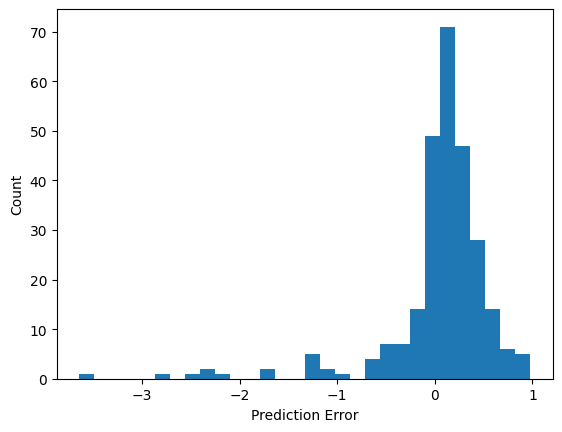

In [48]:
# Error distribution
error = dnn_predictions - test_label
plt.hist(error, bins=30)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')


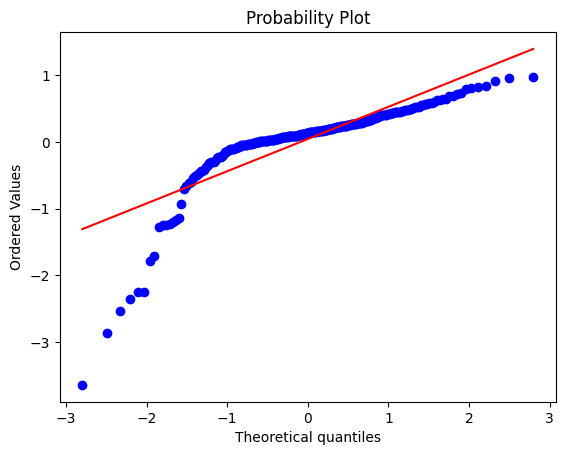

In [49]:
# Q-Q Plot
stats.probplot(error, dist="norm", plot=pylab)
pylab.show()

# Hyperparameter Optimization

Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your model. The process of selecting the right set of hyperparameters for your machine learning (ML) application is called hyperparameter tuning or hypertuning.

Hyperparameters are the variables that govern the training process and the topology of the ML model. These variables remain constant over the training process and directly impact the performance of your ML program. Hyperparameters are of two types:

1. Model hyperparameters which influence model selection such as the number and width of hidden layers
2. Algorithm hyperparameters which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier


In [51]:
!pip install keras-tuner --upgrade
import keras_tuner as kt
from numpy.random import seed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.7 MB/s eta 0:00:00


In [52]:
#Function that return Keras model (changing only the value of the learning rate and nodes per layer)

def build_hp_model(hp):
    model = keras.Sequential([normalizer])
    model.add(keras.layers.Dense(
        hp.Choice('units',[8,16,32,64, 128]), activation='relu'))
    model.add(keras.layers.Dense(
        hp.Choice('units',[8,16,32,64, 128]), activation='relu'))
    model.add(keras.layers.Dense(1))
    hp_learning_rate=hp.Choice('learning_rate', values=[0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1])
    model.compile(loss='mse', metrics=['mse'],
                  optimizer=tf.keras.optimizers.Adam(hp_learning_rate))
    return model

## Random Search Tuner

In [53]:
# Random search set up

tuner_rs=kt.RandomSearch(
    build_hp_model,
    objective='val_loss',
    seed=42,
    max_trials=10,
    overwrite=True)
    #project_name="SWB_one"
    #directory='random_search')



In [54]:
tuner_rs.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [55]:
%%time
start_rs=time.time()
# Run Random search

tuner_rs.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True)

end_rs=time.time()
print("time in seconds: ","{:.2f}".format(end_rs-start_rs))

Trial 10 Complete [00h 00m 22s]
val_loss: 11.125381469726562

Best val_loss So Far: 0.3342698812484741
Total elapsed time: 00h 03m 37s
time in seconds:  217.19
CPU times: user 2min 30s, sys: 5.14 s, total: 2min 35s
Wall time: 3min 37s


In [56]:
#Save best hyperparameters
best_rs=tuner_rs.get_best_hyperparameters()[0]
# Build model with best parameters
hrs_model = tuner_rs.hypermodel.build(best_rs)
hrs_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 32)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,496
Trainable params: 1,473
Non-trainable params: 23
_________________________________________________________________


In [57]:
best_rs.values

{'units': 32, 'learning_rate': 0.003}

Epoch 1/100
27/27 - 1s - loss: 91.7558 - mse: 91.7558 - val_loss: 45.9982 - val_mse: 45.9982 - 1s/epoch - 39ms/step
Epoch 2/100
27/27 - 0s - loss: 17.7488 - mse: 17.7488 - val_loss: 5.1612 - val_mse: 5.1612 - 90ms/epoch - 3ms/step
Epoch 3/100
27/27 - 0s - loss: 2.4855 - mse: 2.4855 - val_loss: 1.9827 - val_mse: 1.9827 - 91ms/epoch - 3ms/step
Epoch 4/100
27/27 - 0s - loss: 1.2661 - mse: 1.2661 - val_loss: 1.2961 - val_mse: 1.2961 - 99ms/epoch - 4ms/step
Epoch 5/100
27/27 - 0s - loss: 0.9074 - mse: 0.9074 - val_loss: 0.9983 - val_mse: 0.9983 - 84ms/epoch - 3ms/step
Epoch 6/100
27/27 - 0s - loss: 0.7463 - mse: 0.7463 - val_loss: 0.8000 - val_mse: 0.8000 - 102ms/epoch - 4ms/step
Epoch 7/100
27/27 - 0s - loss: 0.6438 - mse: 0.6438 - val_loss: 0.7132 - val_mse: 0.7132 - 100ms/epoch - 4ms/step
Epoch 8/100
27/27 - 0s - loss: 0.5778 - mse: 0.5778 - val_loss: 0.6185 - val_mse: 0.6185 - 103ms/epoch - 4ms/step
Epoch 9/100
27/27 - 0s - loss: 0.5334 - mse: 0.5334 - val_loss: 0.5839 - val_mse: 0.5839

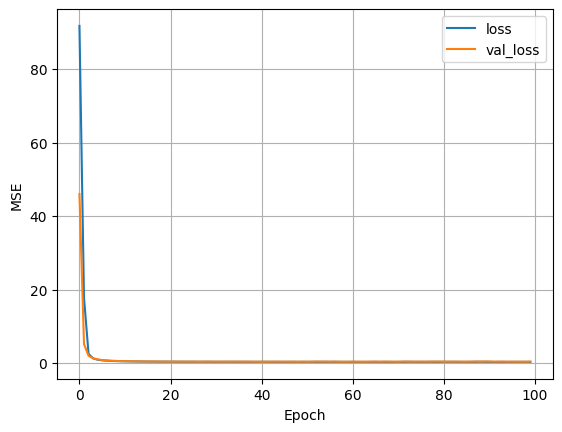

In [58]:
%%time

plot_loss(hrs_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True))

9/9 [==============================] - 0s 3ms/step


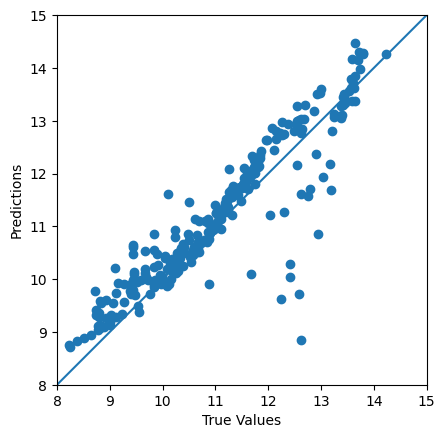

In [59]:
hrs_predictions = hrs_model.predict(test_features).flatten()

hrs = plt.axes(aspect='equal')
plt.scatter(test_label, hrs_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Performance Random Search

In [60]:
MSE_RS=mean_squared_error(hrs_predictions, test_label)
MSE_RS

0.37057660124885716

## Hyperband tuning

In [61]:
tuner_hBand = kt.Hyperband(
    build_hp_model,
    objective='val_loss',
    max_epochs=10,
    hyperband_iterations=2,
    overwrite=True)

In [62]:
tuner_hBand.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [63]:
%%time
start_hb=time.time()
#Perform Tuning with Hyperband
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
tuner_hBand.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True)
#callbacks=[stop_early] not included

end_hb=time.time()
print("time in seconds: ","{:.2f}".format(end_hb-start_hb))

Trial 59 Complete [00h 00m 03s]
val_loss: 0.7510001063346863

Best val_loss So Far: 0.35590121150016785
Total elapsed time: 00h 02m 27s
time in seconds:  147.40
CPU times: user 2min 13s, sys: 2.28 s, total: 2min 15s
Wall time: 2min 27s


In [64]:
#Save best hyperparameters
best_hBand=tuner_hBand.get_best_hyperparameters()[0]

In [65]:
best_hBand.values

{'units': 8,
 'learning_rate': 0.1,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0044'}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 8)                 96        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 200
Trainable params: 177
Non-trainable params: 23
_________________________________________________________________
Epoch 1/100
27/27 - 1s - loss: 27.8809 - mse: 27.8809 - val_loss: 1.6138 - val_mse: 1.6138 - 1s/epoch - 38ms/step
Epoch 2

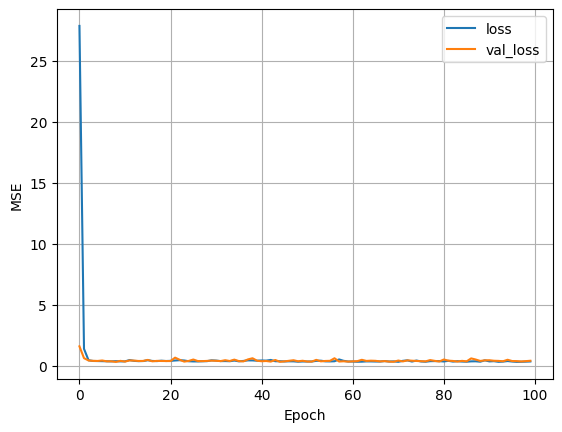

In [66]:
# Build model with best parameters
hBand_model = tuner_hBand.hypermodel.build(best_hBand)
hBand_model.summary()
plot_loss(hBand_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=2,  use_multiprocessing=True))

9/9 [==============================] - 0s 3ms/step


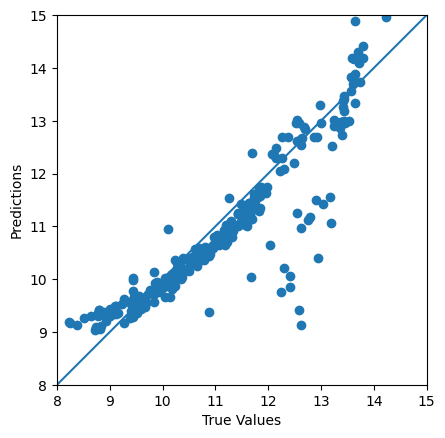

In [67]:
hBand_predictions = hBand_model.predict(test_features).flatten()

hband = plt.axes(aspect='equal')
plt.scatter(test_label, hBand_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Performance Hyperband

In [68]:
MSE_HB=mean_squared_error(hBand_predictions, test_label)
MSE_HB

0.4144140321603908

## Bayes Tuning

In [69]:
tuner_Bayes = kt.BayesianOptimization(
    hypermodel=build_hp_model,
    objective='val_loss',
    max_trials=10,
    num_initial_points=None,
    alpha=0.0001,
    beta=2.6,
    seed=42,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    max_retries_per_trial=0,
    max_consecutive_failed_trials=3,
    overwrite=True
)

In [70]:
tuner_Bayes.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [71]:
%%time
start_bayes=time.time()
tuner_Bayes.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2,
                   use_multiprocessing=True) #callback[stop_early] not incluided

end_bayes=time.time()
print("time in seconds: ","{:.2f}".format(end_bayes-start_bayes))

Trial 10 Complete [00h 00m 22s]
val_loss: 0.35790500044822693

Best val_loss So Far: 0.34290623664855957
Total elapsed time: 00h 03m 10s
time in seconds:  190.41
CPU times: user 2min 28s, sys: 5.07 s, total: 2min 33s
Wall time: 3min 10s


In [72]:
#Save best hyperparameters
best_Bayes=tuner_Bayes.get_best_hyperparameters()[0]
best_Bayes.values

{'units': 16, 'learning_rate': 0.1}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 504
Trainable params: 481
Non-trainable params: 23
_________________________________________________________________
Epoch 1/100
27/27 - 1s - loss: 16.9002 - mse: 16.9002 - val_loss: 1.2808 - val_mse: 1.2808 - 1s/epoch - 38ms/step
Epoch 2

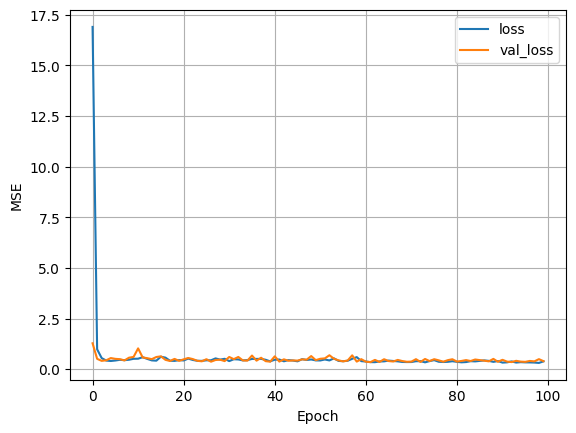

In [73]:
# Build model with best parameters
hBayes_model = tuner_Bayes.hypermodel.build(best_Bayes)
hBayes_model.summary()
plot_loss(hBayes_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True))

9/9 [==============================] - 0s 2ms/step


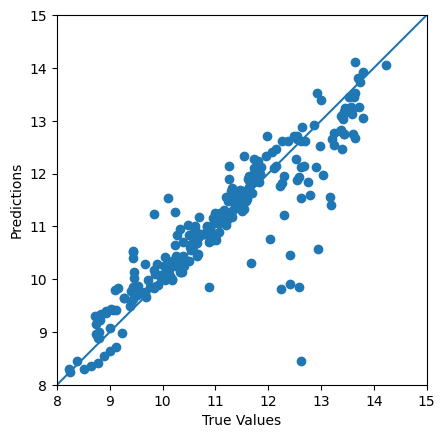

In [75]:
Bayes_predictions = hBayes_model.predict(test_features).flatten()

bayes = plt.axes(aspect='equal')
plt.scatter(test_label, Bayes_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Performance Bayes tuning

In [76]:
MSE_Bayes=mean_squared_error(Bayes_predictions, test_label)
MSE_Bayes

0.362672032202706

## Grid Search

In [77]:
tunerGrid=kt.GridSearch(
    hypermodel=build_hp_model,
    objective='val_loss',
    max_trials=10,
    seed=None,
    hyperparameters=None,
    tune_new_entries=True,
    allow_new_entries=True,
    max_retries_per_trial=0,
    max_consecutive_failed_trials=3,
    overwrite=True
)


In [78]:
tunerGrid.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.02, 0.05, 0.1], 'ordered': True}


In [79]:
%%time

start_grid=time.time()
tunerGrid.search(train_features, train_label, epochs=100, validation_split=0.2, verbose=2, use_multiprocessing=True)
#callbacks=[stop_early],

end_grid=time.time()
print("time in seconds: ","{:.2f}".format(end_grid-start_grid))

Trial 10 Complete [00h 00m 16s]
val_loss: 3.9545414447784424

Best val_loss So Far: 0.341037780046463
Total elapsed time: 00h 03m 07s
time in seconds:  186.97
CPU times: user 2min 26s, sys: 4.97 s, total: 2min 31s
Wall time: 3min 6s


In [82]:
#Save best hyperparameters
bestGrid=tunerGrid.get_best_hyperparameters()[0]
bestGrid.values

{'units': 8, 'learning_rate': 0.1}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 8)                 96        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 200
Trainable params: 177
Non-trainable params: 23
_________________________________________________________________


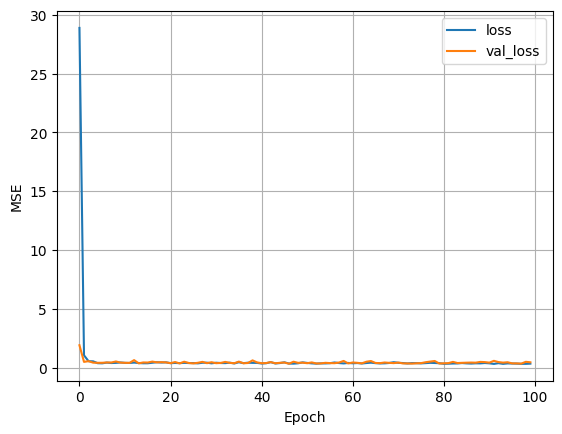

In [83]:
# Build model with best parameters
hGrid_model = tunerGrid.hypermodel.build(bestGrid)
hGrid_model.summary()
plot_loss(hGrid_model.fit(train_features, train_label, epochs=100, validation_split=0.2, verbose=0, use_multiprocessing=True))

9/9 [==============================] - 0s 3ms/step


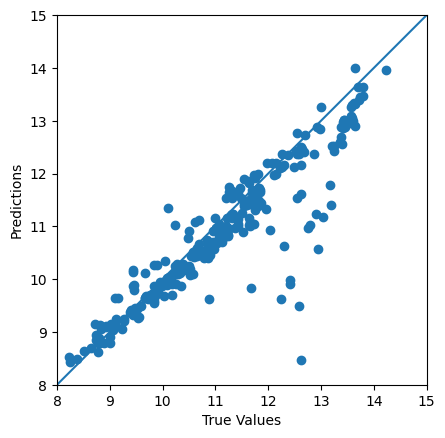

In [84]:
grid_predictions = hGrid_model.predict(test_features).flatten()

grid = plt.axes(aspect='equal')
plt.scatter(test_label, grid_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [8, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Performance Grid Tuning

In [85]:
MSE_Grid=mean_squared_error(grid_predictions, test_label)
MSE_Grid

0.3978114228785561

## Summary of results

In [86]:
Results=[['Simple', MSE_Linear_model, end_simple-start_simple], ['NNet', MSE_DNN, end_dnn-start_dnn],
         ['Random Search', MSE_RS, end_rs-start_rs],['Hyperband', MSE_HB, end_hb-start_hb],
         ['Bayes Hyp', MSE_Bayes, end_bayes-start_bayes], ['Grid Search', MSE_Grid, end_grid-start_grid] ]
Results=pd.DataFrame(Results, columns=['Method', 'MSE', 'time in seconds'])
Results


,Method,MSE,time in seconds
0,Simple,0.416244,18.194704
1,NNet,0.327292,11.046841
2,Random Search,0.370577,217.189177
3,Hyperband,0.414414,147.401174
4,Bayes Hyp,0.362672,190.405396
5,Grid Search,0.397811,186.968422
